<a href="https://colab.research.google.com/github/Exusai/autoDrive_NN_train/blob/main/autodrive_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importar bibliotecas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

### Creando referencias a los datos

In [ ]:
# Carpeta con todas las carpetas con los datasets
path = '/content/drive/MyDrive/DATA/carro'

# Datasets
pista2_manual = path + '/pista2_M'
pista2_manual_mirror = path + '/pista2_M_mir'
pistaTMR = path + '/TMR'
pistaTMR_mirror = path + '/TMR_mir'
pista_con_incidentes = path + '/4lap_w_incidents'
#incidentes = path + '/incidents'
#sim2 = path + '/carSim'
#sim2_mir = path + '/carSim2'

# Directorios de imágenes
imagesPista2_manual = pista2_manual + '/dataset'
imagesPista2_manual_mirror = pista2_manual_mirror + '/dataset'
imagesTMR = pistaTMR + '/dataset'
imagesTMR_mirror = pistaTMR_mirror + '/dataset'
imgs_pista_con_incidentes = pista_con_incidentes + '/dataset'
#imgs_incidentes = incidentes + '/dataset'
#imgsSim = sim2 + '/IMG'
#imgsSim_mir = sim2_mir + '/IMG'

# Lista con las URL's de cada directorio de imágenes
urlsPista2_manual = !ls -1 '{imagesPista2_manual}'
urlsPista2_manual_mirror = !ls -1 '{imagesPista2_manual_mirror}'
urlsTMR = !ls -1 '{imagesTMR}'
urlsTMR_mirror = !ls -1 '{imagesTMR_mirror}'
urlsPista_incidentes = !ls -1 '{imgs_pista_con_incidentes}'
#urlsIncidentes = !ls -1 '{imgs_incidentes}'
#urls_sim = !ls -1 '{imgsSim}'
#urls_sim2 = !ls -1 '{imgsSim_mir}'

print('Imágenes de la pista 2 manual: ', len(urlsPista2_manual))
print('Imágenes de la pista 2 manual mirror: ', len(urlsPista2_manual_mirror))
print('Imágenes de TMR: ', len(urlsTMR))
print('Imágenes de TMR mirror: ', len(urlsTMR_mirror))
print('Imágenes de pista con incidentes: ', len(urlsPista_incidentes))
#print('Imágenes de incidentes: ', len(urlsIncidentes))
#print('Imágenes de sim2: ', len(urls_sim))
#print('Imágenes de sim2_mir: ', len(urls_sim2))

Imágenes de la pista 2 manual:  3624
Imágenes de la pista 2 manual mirror:  4034
Imágenes de TMR:  6963
Imágenes de TMR mirror:  6112
Imágenes de pista con incidentes:  7547


In [ ]:
# Path de los archivos CSV
csvPista2_manual = pista2_manual + '/steering.csv'
csvPista2_manual_mirror = pista2_manual_mirror + '/steering.csv'
csvTMR = pistaTMR + '/steering.csv'
csvTMR_mirror = pistaTMR_mirror + '/steering.csv'
csvPista_incidentes = pista_con_incidentes + '/steering.csv'
#csvIncidentes = incidentes + '/steering.csv'
#csvSim = sim2 + '/driving_log.csv'
#csvSim_mir = sim2_mir + '/driving_log.csv'

# Se leen los CSV con pandas
steering4 = pd.read_csv(csvPista2_manual, names=['angle'])
steering5 = pd.read_csv(csvPista2_manual_mirror, names=['angle'])
steering6 = pd.read_csv(csvTMR, names=['angle'])
steering7 = pd.read_csv(csvTMR_mirror, names=['angle'])
steering8 = pd.read_csv(csvPista_incidentes, names=['angle'])
#steering9 = pd.read_csv(csvIncidentes, names=['angle'])
#steering_sim = pd.read_csv(csvSim, names=['img', 'angle'])
#steering_sim_mir = pd.read_csv(csvSim_mir, names=['img', 'angle'])

# Se busca si es que en algun dataset hay más imágenes que urls o viceversa
print((len(steering4) - len(urlsPista2_manual)))
print((len(steering5) - len(urlsPista2_manual_mirror)))
print((len(steering6) - len(urlsTMR)))
print((len(steering7) - len(urlsTMR_mirror)))
print((len(steering8) - len(urlsPista_incidentes)))
#print((len(steering9) - len(urlsIncidentes)))

# Se añade una columna con las urls de las imágenes y se ordenan
steering4['img'] = urlsPista2_manual.sort(nums = True)
steering5['img'] = urlsPista2_manual_mirror.sort(nums = True)
steering6['img'] = urlsTMR.sort(nums = True)
steering7['img'] = urlsTMR_mirror.sort(nums = True)
steering8['img'] = urlsPista_incidentes.sort(nums = True)
#steering9['img'] = urlsIncidentes.sort(nums = True)

0
0
0
0
0


In [ ]:
# Para entrenar el simulador de udacity 
#steering_sim['img'] = steering_sim['img'].str.replace(r'C:\\Users\\ironm\\Desktop\\carSim\\IMG\\', '')
#steering_sim_mir['img'] = steering_sim_mir['img'].str.replace(r'C:\\Users\\ironm\\Desktop\\carSim2\\IMG\\', '')

In [ ]:
# Para entrenar el simulador de udacity 
#steering_sim_mir.plot.hist(bins=31)
#steering_sim.head()

### Visualizando datos
Se observa que hay un exeso de datos en el centro, esto puede causar comportamientos indeseados

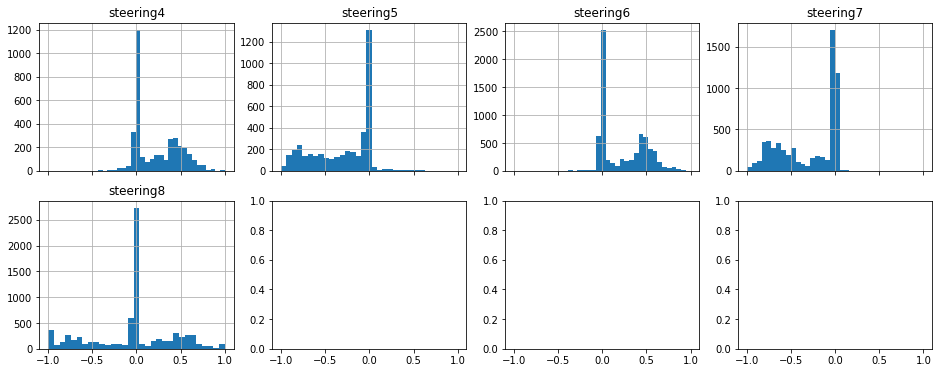

In [ ]:
#steering3.plot.hist(bins=31)
# A veces (casi siempre) es bueno quitar los datos centrales en exeso (data binning)

fig, axs = plt.subplots(2, 4, figsize=(16, 6), sharex=True)

axs[0, 0].hist(steering4['angle'], bins = 31)
axs[0, 0].set_title('steering4')
axs[0, 0].grid(True)

axs[0, 1].hist(steering5['angle'], bins = 31)
axs[0, 1].set_title('steering5')
axs[0, 1].grid(True)

axs[0, 2].hist(steering6['angle'], bins = 31)
axs[0, 2].set_title('steering6')
axs[0, 2].grid(True)

axs[0, 3].hist(steering7['angle'], bins = 31)
axs[0, 3].set_title('steering7')
axs[0, 3].grid(True)

axs[1, 0].hist(steering8['angle'], bins = 31)
axs[1, 0].set_title('steering8')
axs[1, 0].grid(True)

#axs[1, 1].hist(steering9['angle'], bins = 31)
#axs[1, 1].set_title('steering9')
#axs[1, 1].grid(True)

#axs[1, 2].hist(steering9['angle'], bins = 31)
#axs[1, 2].set_title('steering9')
#axs[1, 2].grid(True)

plt.show()

In [ ]:
# Función para equalizar los datos (data binning)
# si se quieren conservar hasta 1000 datos de cada bin o clase se llamaría:
# binningData(31, 1000, data) donde 31 es el número de bins o clases 
# y data es alguno de los dataframes usados arriba

def binningData(nbins, samplesPerBin, data):
  hist, bins = np.histogram(data['angle'].to_numpy(), nbins)
  removeIndexList = []
  for j in range(nbins):
    binDataList = []
    for i in range(len(data['angle'])):
      if data['angle'][i] >= bins[j] and data['angle'][i] <= bins[j+1]:
        binDataList.append(i)
    binDataList = shuffle(binDataList)
    binDataList = binDataList[samplesPerBin:]
    removeIndexList.extend(binDataList)
  print('Removed images: ', len(removeIndexList))
  data.drop(data.index[removeIndexList], inplace=True)
  print('Remaining images: ', len(data))

In [ ]:
# binning data
binningData(31, 400, steering4)
binningData(31, 400, steering5)
binningData(31, 900, steering6)
binningData(31, 500, steering7)
binningData(31, 800, steering8)
#binningData(31, 120, steering9)

#binningData(31, 500, steering_sim)
#binningData(31, 500, steering_sim_mir)

Removed images:  802
Remaining images:  2822
Removed images:  910
Remaining images:  3124
Removed images:  1631
Remaining images:  5332
Removed images:  1885
Remaining images:  4227
Removed images:  1934
Remaining images:  5613


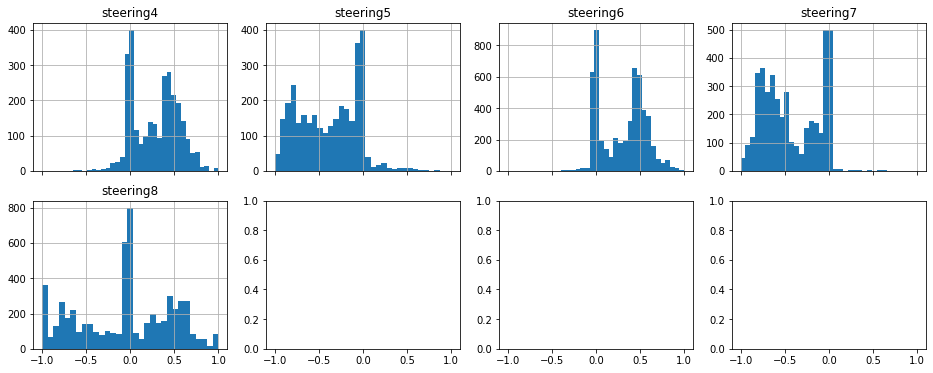

In [ ]:
# Visualizando los datos ya "equalizados"
#steering3.plot.hist(bins=31)

fig, axs = plt.subplots(2, 4, figsize=(16, 6), sharex=True)

axs[0, 0].hist(steering4['angle'], bins = 31)
axs[0, 0].set_title('steering4')
axs[0, 0].grid(True)

axs[0, 1].hist(steering5['angle'], bins = 31)
axs[0, 1].set_title('steering5')
axs[0, 1].grid(True)

axs[0, 2].hist(steering6['angle'], bins = 31)
axs[0, 2].set_title('steering6')
axs[0, 2].grid(True)

axs[0, 3].hist(steering7['angle'], bins = 31)
axs[0, 3].set_title('steering7')
axs[0, 3].grid(True)

axs[1, 0].hist(steering8['angle'], bins = 31)
axs[1, 0].set_title('steering8')
axs[1, 0].grid(True)

#axs[1, 1].hist(steering9['angle'], bins = 31)
#axs[1, 1].set_title('steering9')
#axs[1, 1].grid(True)

#axs[1, 2].hist(steering9['angle'], bins = 31)
#axs[1, 2].set_title('steering9')
#axs[1, 2].grid(True)

plt.show()

In [ ]:
# Shuffling
steering4 = shuffle(steering4)
steering5 = shuffle(steering5)
steering6 = shuffle(steering6)
steering7 = shuffle(steering7)
steering8 = shuffle(steering8)
#steering9 = shuffle(steering9)

#steering_sim = shuffle(steering_sim)
#steering_sim_mir = shuffle(steering_sim_mir)

### Funciones de carga para el Tensorflow input pipeline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


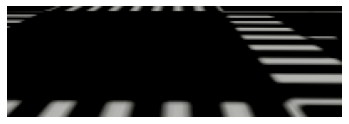

Angle:  0.5


In [ ]:
def crop(inimg):
  image = inimg[270:405, :, :]
  #image = inimg[60:135, :, :] # udacity simulator
  image = tf.image.resize(image, [66, 200])
  #image = tf.image.rgb_to_yuv(image) # Lo he probado con YUV, pero no he visto mejoras perceptibles
  return image

def normalize(image):
  #inImg = (image/127.5) - 1  # normaliza de 0 a 255 -> -1 a 1
  inImg = image/255           # normaliza de 0 a 255 -> 0 a 1
  return inImg

def loadPista(filename, angle, dir, flip = False, augment = False):
  inImg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(dir + '/' + filename)), tf.float32)[...,:3]
  inImg = tf.image.adjust_contrast(inImg, 2)
  #inImg = tf.image.adjust_brightness(inImg, delta = 0.1) # udacity simulator

  # aumentación de datos aleatoria
  if augment:
    if np.random.rand() < 0.5:
      inImg = tf.image.random_hue(inImg, .2)
    if np.random.rand() < 0.5:
      inImg = tf.image.random_saturation(inImg, 1, 3)
    if np.random.rand() < 0.5:
      inImg = tf.image.random_brightness(inImg, 0.5)
    if np.random.rand() < 0.5:
      inImg = tf.image.random_contrast(inImg, 0.4, 1)

  inImg = normalize(inImg)
  inImg = crop(inImg)
  
  # se invierte la imágen horizontalmente y si se hace, se invirte el ángulo
  if flip:
    inImg = tf.image.flip_left_right(inImg)
    angle = angle * -1

  # el último paso de la aumentación de datos es un corte aleatorio al que después
  # se le cambia el tamaño para que pueda ser procesado por la red
  if augment:
    if np.random.rand() < 0.5:
      inImg = tf.image.random_crop(value=inImg, size=(50, 100, 3))
      inImg = tf.image.resize(inImg, [66, 200])

  return inImg, angle

# Prueba función de load
#image, angle = loadPista(urls_sim[1], .5, imgsSim, flip=False, augment=False) # udacity simulator 
image, angle = loadPista(urlsPista2_manual[1], .5, imagesPista2_manual, flip=False, augment=False)
#plt.title('Imagen de prueba: ' + urlsPista2_manual[0])
#plt.imshow((image + 1) / 2)    # Si se normalizó de -1 a 1
plt.imshow(image)               # Si se normalizó de 0 a 1
plt.axis('off')
plt.show()
print('Angle: ', angle)
#print(np.shape(image))

### Dataset

In [ ]:
# imagesPista2_manual = pista2_manual + '/dataset'
# imagesPista2_manual_mirror = pista2_manual_mirror + '/dataset'
# imagesTMR = pistaTMR + '/dataset'
# imagesTMR_mirror = pistaTMR_mirror + '/dataset'
# imgs_pista_con_incidentes = pista_con_incidentes + '/dataset'
# imgs_incidentes = incidentes + '/dataset'

# Se crean "sub-datasets" con los diferentes archivos csv e imágenes
dataset_p1 = tf.data.Dataset.from_tensor_slices((steering4['img'].to_list(), np.squeeze(steering4['angle'].to_numpy())))
dataset_p1 = dataset_p1.map(lambda img, ang: loadPista(img, ang, imagesPista2_manual, flip=False, augment=False))

dataset_p2 = tf.data.Dataset.from_tensor_slices((steering5['img'].to_list(), np.squeeze(steering5['angle'].to_numpy())))
dataset_p2 = dataset_p2.map(lambda img, ang: loadPista(img, ang, imagesPista2_manual_mirror, flip=False, augment=False))

dataset_p3 = tf.data.Dataset.from_tensor_slices((steering6['img'].to_list(), np.squeeze(steering6['angle'].to_numpy())))
dataset_p3 = dataset_p3.map(lambda img, ang: loadPista(img, ang, imagesTMR, flip=False, augment=False))

dataset_p4 = tf.data.Dataset.from_tensor_slices((steering7['img'].to_list(), np.squeeze(steering7['angle'].to_numpy())))
dataset_p4 = dataset_p4.map(lambda img, ang: loadPista(img, ang, imagesTMR_mirror, flip=False, augment=False))

dataset_p5 = tf.data.Dataset.from_tensor_slices((steering8['img'].to_list(), np.squeeze(steering8['angle'].to_numpy())))
dataset_p5 = dataset_p5.map(lambda img, ang: loadPista(img, ang, imgs_pista_con_incidentes, flip=False, augment=False))

#dataset_p6 = tf.data.Dataset.from_tensor_slices((steering8['img'].to_list(), np.squeeze(steering8['angle'].to_numpy())))
#dataset_p6 = dataset_p6.map(lambda img, ang: loadPista(img, ang, imgs_incidentes, flip=False, augment=False))

# Los mismos datasets pero ahora con flip
dataset_p1_flip = tf.data.Dataset.from_tensor_slices((steering4['img'].to_list(), np.squeeze(steering4['angle'].to_numpy())))
dataset_p1_flip = dataset_p1_flip.map(lambda img, ang: loadPista(img, ang, imagesPista2_manual, flip=True, augment=False))

dataset_p2_flip = tf.data.Dataset.from_tensor_slices((steering5['img'].to_list(), np.squeeze(steering5['angle'].to_numpy())))
dataset_p2_flip = dataset_p2_flip.map(lambda img, ang: loadPista(img, ang, imagesPista2_manual_mirror, flip=True, augment=False))

dataset_p3_flip = tf.data.Dataset.from_tensor_slices((steering6['img'].to_list(), np.squeeze(steering6['angle'].to_numpy())))
dataset_p3_flip = dataset_p3_flip.map(lambda img, ang: loadPista(img, ang, imagesTMR, flip=True, augment=False))

dataset_p4_flip = tf.data.Dataset.from_tensor_slices((steering7['img'].to_list(), np.squeeze(steering7['angle'].to_numpy())))
dataset_p4_flip = dataset_p4_flip.map(lambda img, ang: loadPista(img, ang, imagesTMR_mirror, flip=True, augment=False))

dataset_p5_flip = tf.data.Dataset.from_tensor_slices((steering8['img'].to_list(), np.squeeze(steering8['angle'].to_numpy())))
dataset_p5_flip = dataset_p5_flip.map(lambda img, ang: loadPista(img, ang, imgs_pista_con_incidentes, flip=True, augment=False))

#dataset_p6_flip = tf.data.Dataset.from_tensor_slices((steering8['img'].to_list(), np.squeeze(steering8['angle'].to_numpy())))
#dataset_p6_flip = dataset_p6_flip.map(lambda img, ang: loadPista(img, ang, imgs_incidentes, flip=True, augment=False))

# Datos con aumentación
dataset_augmented_1 = tf.data.Dataset.from_tensor_slices((steering6['img'].to_list(), np.squeeze(steering6['angle'].to_numpy())))
dataset_augmented_1 = dataset_augmented_1.map(lambda img, ang: loadPista(img, ang, imagesTMR, flip=False, augment=True))

dataset_augmented_2 = tf.data.Dataset.from_tensor_slices((steering7['img'].to_list(), np.squeeze(steering7['angle'].to_numpy())))
dataset_augmented_2 = dataset_augmented_2.map(lambda img, ang: loadPista(img, ang, imagesTMR_mirror, flip=False, augment=True))

# Concatenando todos los datasets
fullDataset = dataset_p1.concatenate(dataset_p2)
fullDataset = fullDataset.concatenate(dataset_p3)
fullDataset = fullDataset.concatenate(dataset_p4)
fullDataset = fullDataset.concatenate(dataset_p5)
fullDataset = fullDataset.concatenate(dataset_augmented_1)
fullDataset = fullDataset.concatenate(dataset_p1_flip)
fullDataset = fullDataset.concatenate(dataset_p2_flip)
fullDataset = fullDataset.concatenate(dataset_p3_flip)
fullDataset = fullDataset.concatenate(dataset_p4_flip)
fullDataset = fullDataset.concatenate(dataset_p5_flip)
fullDataset = fullDataset.concatenate(dataset_augmented_2)

# Se define el TAMAÑO DE LOTE O BATCH
# Para aprovechar el GPU y acelerar el entrenamiento, el tamaño de batch debe ser una potencia de 2.
# Si hay un tensor allocation error, disminuir este número podría resolverlo.
# Mientras haya vram disponible, el tamaño de batch puede ser tan grande como se
# necesite y CREO que lotes más grandes entrenan la red más rapido hasta cierto punto, CREO.
# En otras palabras el lote o batch es cuantas imágenes se procesan antes de actualizar
# los pesos o cuántas imágenes se "toman en cuenta" al actualizar los pesos.
# Si el batch es de 1, la red básicamente se estaría entrenando con SGD (stochastic gradient descent)
# a pesar de que se escoja otro optimizador como Adam
fullDataset = fullDataset.batch(256)

#fullDataset = fullDataset.prefetch(tf.data.experimental.AUTOTUNE)

DATASET_SIZE = fullDataset.cardinality().numpy()
#fullDataset = fullDataset.shuffle(DATASET_SIZE) # es muy tardado sin GPU, de hecho es tardado con GPU

# Tamaño de datasets de validación y entrenemiento
# se usó toda la información como entrenamiento por que el paso de validación suele tomar algo de tiempo
# de todas formas la verdadera validación es en el simulador
train_size = int(1 * DATASET_SIZE)
val_size = int(0 * DATASET_SIZE)

print("Tamaño del dataset en lotes (batches): ", DATASET_SIZE)
print("Tamaño del dataset de entrenamiento en lotes (batches): ", train_size)
print("Tamaño del dataset de validacipon en lotes (batches): ", val_size)

train_dataset = fullDataset.take(train_size)
val_dataset = fullDataset.skip(train_size)

# No correr el siguiente código a menos que tamaño de batch sea 1
''' 
for testImage, angle in train_dataset.take(4):
  pass

print('shape of img: ', np.shape(testImage[0]))
plt.imshow((testImage[0, ...] + 1) / 2)
plt.axis('off')
plt.show()
print('Angle: ', angle[0]) '''

Tamaño del dataset en lotes (batches):  181
Tamaño del dataset de entrenamiento en lotes (batches):  181
Tamaño del dataset de validacipon en lotes (batches):  0


" \nfor testImage, angle in train_dataset.take(4):\n  pass\n\nprint('shape of img: ', np.shape(testImage[0]))\nplt.imshow((testImage[0, ...] + 1) / 2)\nplt.axis('off')\nplt.show()\nprint('Angle: ', angle[0]) "

### Dataset para el udacity simulator

In [ ]:
''' dataset_p1 = tf.data.Dataset.from_tensor_slices((steering_sim['img'].to_list(), np.squeeze(steering_sim['angle'].to_numpy())))
dataset_p1 = dataset_p1.map(lambda img, ang: loadPista(img, ang, imgsSim, flip=False, augment=False))

dataset_p2 = tf.data.Dataset.from_tensor_slices((steering_sim_mir['img'].to_list(), np.squeeze(steering_sim_mir['angle'].to_numpy())))
dataset_p2 = dataset_p2.map(lambda img, ang: loadPista(img, ang, imgsSim_mir, flip=False, augment=False))

dataset_p3 = tf.data.Dataset.from_tensor_slices((steering_sim['img'].to_list(), np.squeeze(steering_sim['angle'].to_numpy())))
dataset_p3 = dataset_p3.map(lambda img, ang: loadPista(img, ang, imgsSim, flip=False, augment=True))

dataset_p4 = tf.data.Dataset.from_tensor_slices((steering_sim_mir['img'].to_list(), np.squeeze(steering_sim_mir['angle'].to_numpy())))
dataset_p4 = dataset_p4.map(lambda img, ang: loadPista(img, ang, imgsSim_mir, flip=False, augment=True))

dataset_p5 = tf.data.Dataset.from_tensor_slices((steering_sim['img'].to_list(), np.squeeze(steering_sim['angle'].to_numpy())))
dataset_p5 = dataset_p5.map(lambda img, ang: loadPista(img, ang, imgsSim, flip=True, augment=False))

dataset_p6 = tf.data.Dataset.from_tensor_slices((steering_sim_mir['img'].to_list(), np.squeeze(steering_sim_mir['angle'].to_numpy())))
dataset_p6 = dataset_p6.map(lambda img, ang: loadPista(img, ang, imgsSim_mir, flip=True, augment=False))

dataset_p7 = tf.data.Dataset.from_tensor_slices((steering_sim['img'].to_list(), np.squeeze(steering_sim['angle'].to_numpy())))
dataset_p7 = dataset_p7.map(lambda img, ang: loadPista(img, ang, imgsSim, flip=True, augment=True))

dataset_p8 = tf.data.Dataset.from_tensor_slices((steering_sim_mir['img'].to_list(), np.squeeze(steering_sim_mir['angle'].to_numpy())))
dataset_p8 = dataset_p8.map(lambda img, ang: loadPista(img, ang, imgsSim_mir, flip=True, augment=True))

# Concatenando todos los datasets
fullDataset = dataset_p1.concatenate(dataset_p2)
fullDataset = fullDataset.concatenate(dataset_p3)
fullDataset = fullDataset.concatenate(dataset_p4)
fullDataset = fullDataset.concatenate(dataset_p5)
fullDataset = fullDataset.concatenate(dataset_p6)
fullDataset = fullDataset.concatenate(dataset_p7)
fullDataset = fullDataset.concatenate(dataset_p8)


fullDataset = fullDataset.batch(4)
#fullDataset = fullDataset.prefetch(tf.data.experimental.AUTOTUNE)

DATASET_SIZE = fullDataset.cardinality().numpy()

#fullDataset = fullDataset.shuffle(DATASET_SIZE)

train_size = int(1 * DATASET_SIZE)
val_size = int(0 * DATASET_SIZE)

print("Tamaño del dataset en lotes (batches): ", DATASET_SIZE)
print("Tamaño del dataset de entrenamiento en lotes (batches): ", train_size)
print("Tamaño del dataset de validacipon en lotes (batches): ", val_size)

train_dataset = fullDataset.take(train_size)
val_dataset = fullDataset.skip(train_size) '''

# No correr el siguiente código a menos que el tamaño del batch sea 1
''' for testImage, angle in train_dataset.take(4):
  pass

print('shape of img: ', np.shape(testImage[0]))
plt.imshow((testImage[0, ...] + 1) / 2)
plt.axis('off')
plt.show()
print('Angle: ', angle[0]) '''

Tamaño del dataset en lotes (batches):  6362
Tamaño del dataset de entrenamiento en lotes (batches):  6362
Tamaño del dataset de validacipon en lotes (batches):  0


" for testImage, angle in train_dataset.take(4):\n  pass\n\nprint('shape of img: ', np.shape(testImage[0]))\nplt.imshow((testImage[0, ...] + 1) / 2)\nplt.axis('off')\nplt.show()\nprint('Angle: ', angle[0]) "

### Red neuronal
Es la misma que la implementada en el paper de Nvidia

In [ ]:
# Red
from tensorflow.keras import *
from tensorflow.keras.layers import *

initializer = tf.random_normal_initializer(0., 0.04)

model = models.Sequential()

model.add(tf.keras.layers.Input(shape = [66, 200, 3]))

model.add(layers.Conv2D(24, (5, 5), (2,2) , activation='elu',padding='SAME', kernel_initializer = initializer))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))

model.add(layers.Conv2D(36, (5, 5), (2,2), activation='elu', padding='SAME', kernel_initializer = initializer))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))

model.add(layers.Conv2D(48, (5, 5), (2,2), activation='elu', padding='SAME', kernel_initializer = initializer))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='elu', padding='SAME', kernel_initializer = initializer))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='elu', padding='SAME', kernel_initializer = initializer))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))

#model.add(layers.GlobalMaxPool2D())

model.add(Flatten())

model.add(Dense(100, activation='elu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(50, activation='elu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization())

#model.add(Dense(25, activation='elu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(10, activation='elu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1))

#opt = tf.keras.optimizers.Adam(learning_rate=0.3)
opt = tf.keras.optimizers.Adam(2e-4, beta_1 = 0.5)

model.compile(
    #loss='mean_absolute_error',
    loss = 'mean_squared_error',
    metrics = 'mean_absolute_error',
    optimizer= opt
    )

print(model.summary())
#utils.plot_model(model)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 33, 100, 24)       1824      
                                                                 
 conv2d_36 (Conv2D)          (None, 17, 50, 36)        21636     
                                                                 
 conv2d_37 (Conv2D)          (None, 9, 25, 48)         43248     
                                                                 
 conv2d_38 (Conv2D)          (None, 9, 25, 64)         27712     
                                                                 
 conv2d_39 (Conv2D)          (None, 9, 25, 64)         36928     
                                                                 
 flatten_7 (Flatten)         (None, 14400)             0         
                                                                 
 dense_32 (Dense)            (None, 100)              

In [ ]:
# carga el modelo, por si se esta reanudando el entrenamiento previo
#model = tf.keras.models.load_model(path + '/DriverV0_SIM.h5')

In [ ]:
# Prueba la red con o sin entrenamiento
# No correr si el tamaño del batch es mayor a 1
# Toma el primer lote del dataset de entrenamiento y hace inferencia
''' for testImage, angle in train_dataset.take(1):
  pass

predict = model(testImage, training = False)

#plt.imshow((testImage[0, ...] + 1) / 2)   # Si se normalizó de -1 a 1
plt.imshow(testImage[0, ...])              # Si se normalizó de 0 a 1
plt.axis('off')
plt.show()
print('Angle: ', predict)
print('Truth: ', angle) '''

" for testImage, angle in train_dataset.take(1):\n  pass\n\npredict = model(testImage, training = False)\n\nplt.imshow((testImage[0, ...] + 1) / 2)\nplt.axis('off')\nplt.show()\nprint('Angle: ', predict)\nprint('Truth: ', angle) "

### Entrenamiento
1.   Primero se dejó entrenar la red por 2 epochs.
2.   Se tomaron las últimas 4 capas (Dense layers) y su parametro de trainable se puso en falso, para evitar que los pesos y bias de esta parte de la red se actualizaran y después se entrenó la red por 3 épocas.
3.   Se toman las primeras 5 capas de la red (Conv2D layers) y se pone el atributo trainable en falso, y se entrena la red por 2 épocas.
4.   Finalmente se hace entrenable a toda la red y se entrenó por 2 epochs más

In [ ]:
# El codigo usado para volver entrenables o no entrenables las capas
#for layer in model.layers[5:]:   # primeras 5 capas
#for layer in model.layers[-4:]:  # últimas 4 capas
for layer in model.layers:        # Nombre de la capa y parametro entrenable
  #layer.trainable = False
  #layer.trainable = True
  print('-----------')
  print(layer.name)
  print(layer.trainable)

-----------
dense_32
False
-----------
dense_33
False
-----------
dense_34
False
-----------
dense_35
False


In [ ]:
history = model.fit(
    train_dataset,
    epochs = 2,
    #validation_data = val_dataset
    )

Epoch 1/2
181/181 [==============================] - 887s 5s/step - loss: 0.0261 - mean_absolute_error: 0.1126
Epoch 2/2
181/181 [==============================] - 957s 5s/step - loss: 0.0258 - mean_absolute_error: 0.1121


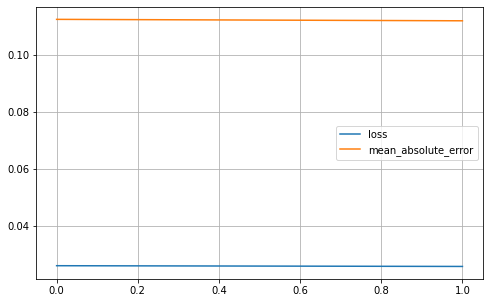

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
#plt.ylim((0,1))
plt.show()

In [ ]:
#import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open(path + '/DriverV0_SIM.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp5wk4eosv/assets


In [ ]:
# Guarda el modelo
model.save(path +'/DriverV0.h5')

# Visualizar filtros de la red

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfd
from tensorflow.keras import (datasets, layers, models)
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

path = '/content/drive/MyDrive/DATA/carro'
model_l = tf.keras.models.load_model(path +'/DriverV0.h5')
#model_l = tf.keras.models.load_model('/content/drive/MyDrive/DATA/Animu2xV2/Models/SRWNNbase.h5')
#model_l = tf.keras.models.load_model(path +'/modelBinAug4.h5')
pista1 = path + '/TMR'
pista2 = path + '/pista2'
imagesPista1 = pista1 + '/dataset'
imagesPista2 = pista2 + '/dataset'


# load image of rocky
rocky = image.load_img(imagesPista2 + '/' + 'im_road320.png')
#rocky = image.load_img('/content/drive/MyDrive/DATA/Animu2xV2/EP4PfHgU4AI8NQ-.jpg')
rocky_as_tensor = image.img_to_array(rocky)

rocky_as_tensor = (rocky_as_tensor/127.5) - 1
rocky_as_tensor = rocky_as_tensor[270:405, :, :]
rocky_as_tensor = tf.image.resize(rocky_as_tensor, [66, 200])

rocky_as_tensor = np.expand_dims(rocky_as_tensor, axis=0)
print("shape", rocky_as_tensor.shape)


# get layer for catch the output
#layer_outputs = [layer.output for layer in model_l.layers[:11]]
layer_outputs = [layer.output for layer in model_l.layers]
activation_model = models.Model(inputs=model_l.input, outputs=layer_outputs)
#feed the model with the image
activations = activation_model(rocky_as_tensor)

shape (1, 66, 200, 3)


In [ ]:
conv_indixes = []
for i in range(len(activations)):
    if( "conv2d" in model_l.layers[i].name):
        conv_indixes.append(i)
        print("Layer: ", model_l.layers[i].name, " Shape: ", activations[i].shape)

Layer:  conv2d_35  Shape:  (1, 33, 100, 24)
Layer:  conv2d_36  Shape:  (1, 17, 50, 36)
Layer:  conv2d_37  Shape:  (1, 9, 25, 48)
Layer:  conv2d_38  Shape:  (1, 9, 25, 64)
Layer:  conv2d_39  Shape:  (1, 9, 25, 64)


Processing conv2d_35 layer...


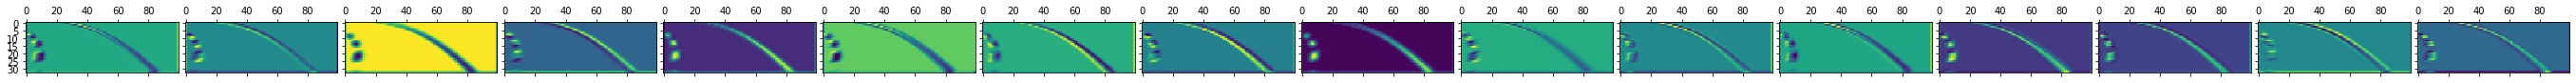

Processing conv2d_36 layer...


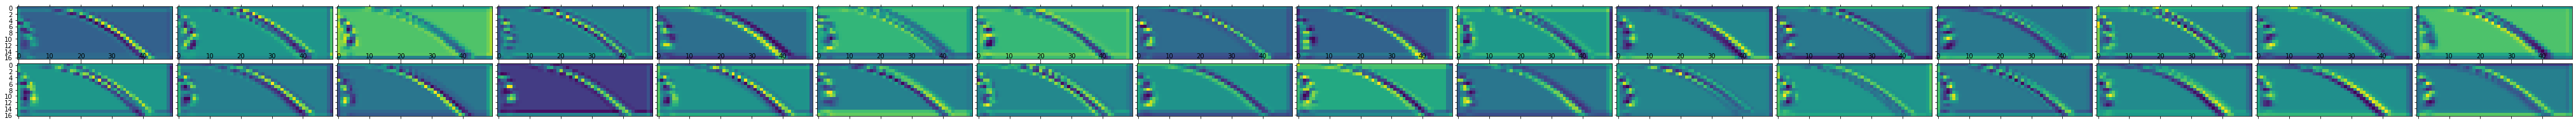

Processing conv2d_37 layer...


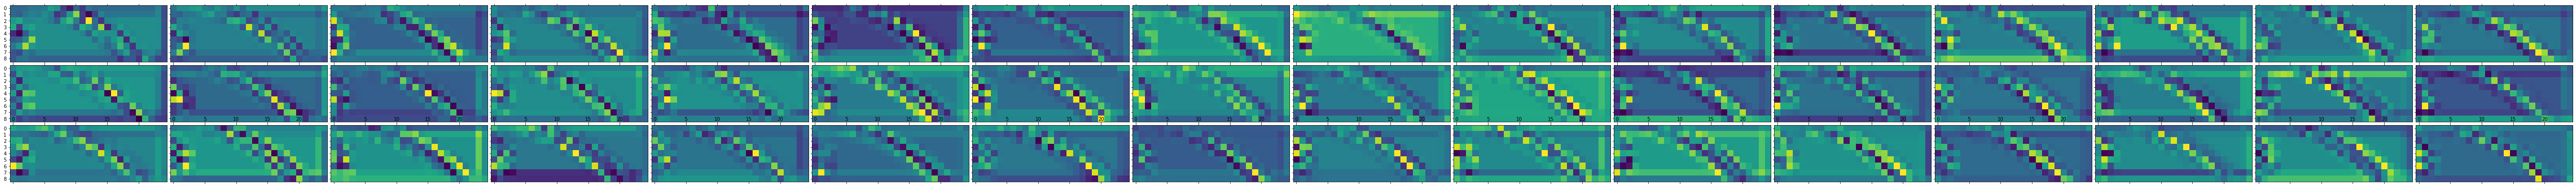

Processing conv2d_38 layer...


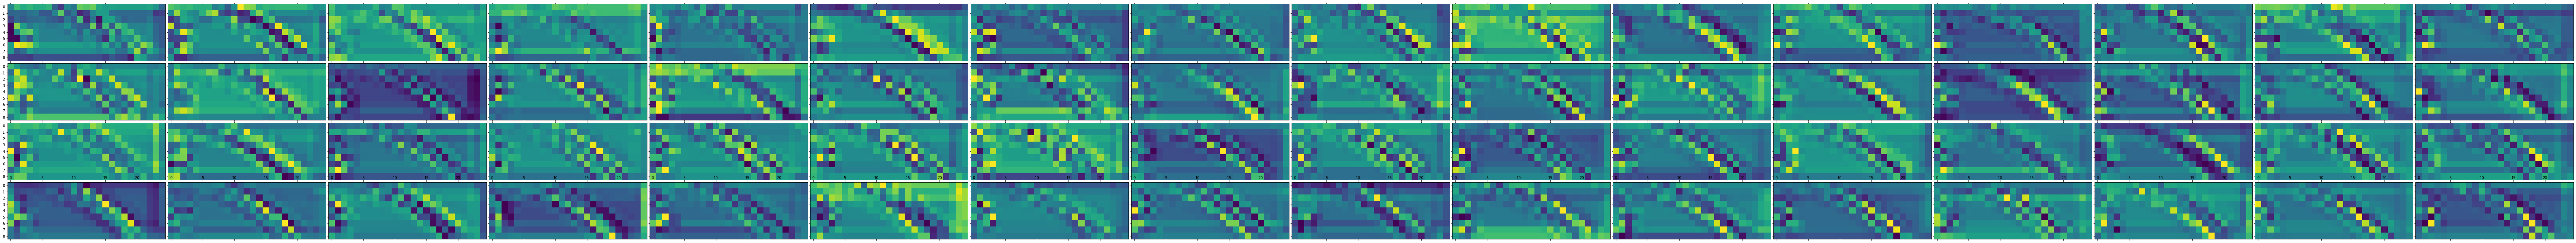

Processing conv2d_39 layer...


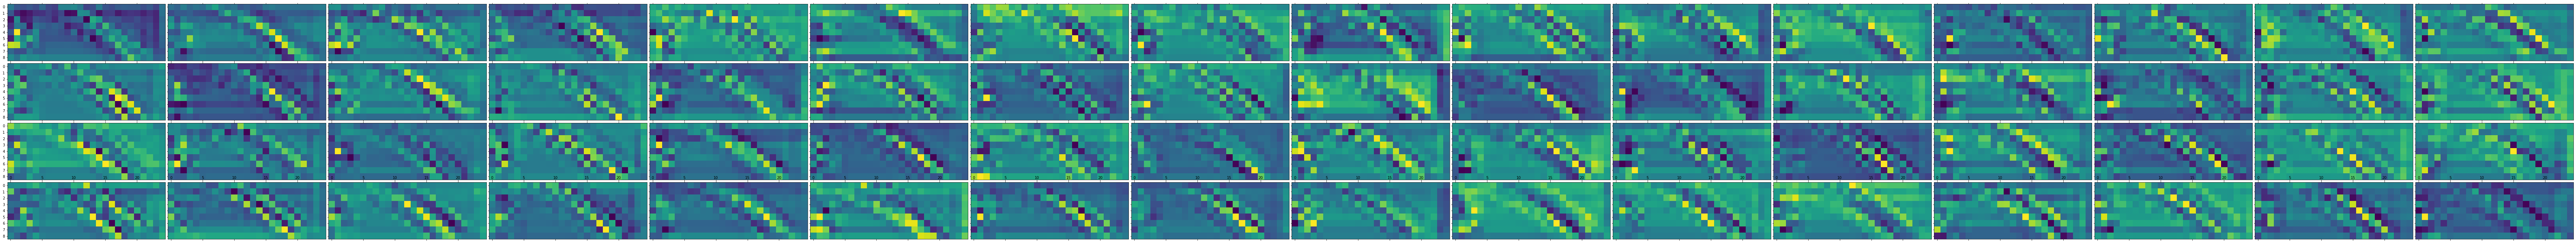

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
#https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

def plot_layer(name, activation):
    print("Processing {} layer...".format(name))
    how_many_features_map = activation.shape[3]

    figure_size = how_many_features_map * 2
    fig = plt.figure(figsize=(figure_size, figure_size),)

    grid = ImageGrid(fig, 111,
                     nrows_ncols=(how_many_features_map // 16, 16),
                     axes_pad=0.1,  # pad between axes in inch.
                     )  
    images = [activation[0, :, :, i] for i in range(how_many_features_map)]

    for ax, img in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.matshow(img)
    plt.show()

#for each conv2d layer plot the feature maps
for i, conv_ix in enumerate(conv_indixes):
    plot_layer(model_l.layers[conv_ix].name, activations[conv_ix])